In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
# アイリスの計測データ
from sklearn.datasets import load_iris
# pytorchのデータセット
from torch.utils.data import Dataset,DataLoader
import math

## モデルの定義

In [2]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9,out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features , h1)
        self.fc2 = nn.Linear(h1 , h2)
        self.fc3 = nn.Linear(h2 , out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

## データセットクラス（ミニバッチ）

In [3]:
class IrisDataset(Dataset):
    def __init__(self):
        iris = load_iris()
        X=iris.data
        Y=iris.target
        
        X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.20, random_state=123) 
        
        self.X_data = torch.FloatTensor(X_train)
        self.X_test = torch.FloatTensor(X_test)
        self.Y_data = torch.LongTensor(Y_train)
        self.Y_test = torch.LongTensor(Y_test)
        
        self.datalen = len(self.Y_data)
        
    def __getitem__(self, index):
        return self.X_data[index], self.Y_data[index]
    
    def __len__(self):
        return self.datalen

In [4]:
Batch_size = 20
dataset = IrisDataset()
trainloader = DataLoader(dataset=dataset, batch_size = Batch_size, shuffle=True)

In [5]:
torch.manual_seed(3)
model = Model()
## 出力値が３つなので、CrossEntropyLoss (使う場合は、softmax関数を内部で処理しているため、ニューラルネットワークにsoftmax関数は使用しない)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [6]:
epochs=100
loss_list = []
total_samples = len(dataset)
print(total_samples)
n_iterations=math.ceil(total_samples/Batch_size)
print(n_iterations)



120
6


In [7]:
for epoch in range(epochs):
    
    for i, data in enumerate(trainloader):
        
        X , Y = data
        print(f'epoch: {epoch+1}/{epochs}, iteration {i+1}/{n_iterations}, Inputs {X.shape}, Labels {Y.shape}')
        
        y_pred = model.forward(X.data)
        loss = criterion(y_pred, Y.data)
    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
        loss_list.append(loss)
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1} loss: {loss.item():4f}')

epoch: 1/100, iteration 1/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 1/100, iteration 2/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 1/100, iteration 3/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 1/100, iteration 4/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 1/100, iteration 5/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 1/100, iteration 6/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 2/100, iteration 1/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 2/100, iteration 2/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 2/100, iteration 3/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 2/100, iteration 4/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 2/100, iteration 5/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 2/100, iteration 6/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 3/100, iteration 1/6,

epoch: 27/100, iteration 2/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 27/100, iteration 3/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 27/100, iteration 4/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 27/100, iteration 5/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 27/100, iteration 6/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 28/100, iteration 1/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 28/100, iteration 2/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 28/100, iteration 3/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 28/100, iteration 4/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 28/100, iteration 5/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 28/100, iteration 6/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 29/100, iteration 1/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 29/100, i

epoch: 52/100, iteration 5/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 52/100, iteration 6/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 53/100, iteration 1/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 53/100, iteration 2/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 53/100, iteration 3/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 53/100, iteration 4/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 53/100, iteration 5/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 53/100, iteration 6/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 54/100, iteration 1/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 54/100, iteration 2/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 54/100, iteration 3/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 54/100, iteration 4/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 54/100, i

epoch: 80/100, iteration 6/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 80 loss: 0.017166
epoch: 81/100, iteration 1/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 81/100, iteration 2/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 81/100, iteration 3/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 81/100, iteration 4/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 81/100, iteration 5/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 81/100, iteration 6/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 82/100, iteration 1/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 82/100, iteration 2/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 82/100, iteration 3/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 82/100, iteration 4/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
epoch: 82/100, iteration 5/6, Inputs torch.Size([20, 4]), Labels torch.Si

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


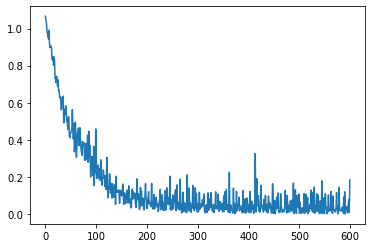

In [8]:
plt.plot(loss_list)

## 検証データを使って検証する

In [11]:
with torch.no_grad():
    predicted_y = model.forward(dataset.X_test)
    loss = criterion(predicted_y , dataset.Y_test)
    print(loss.item())

0.09727881848812103


# モデルの保存

In [36]:
torch.save(model.state_dict(),'irisModel.pt')

# 未知のデータの予測

In [38]:
# 予測するモードに変更
model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (fc3): Linear(in_features=9, out_features=3, bias=True)
)

In [39]:
# 予測に使う入力データ
new_iris = torch.tensor([5.6, 3.7, 2.1, 0.7])

In [40]:
with torch.no_grad():
    # 予測結果（３項目返ってきて、それぞれの確率）
    print(model(new_iris))
    # ０番目が正解
    print(model(new_iris).argmax())

tensor([  5.1438,   0.7898, -10.9314])
tensor(0)


# 保存したモデルの読み込み、予測

In [43]:
new_model = Model()
new_model.load_state_dict(torch.load('irisModel.pt'))
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (fc3): Linear(in_features=9, out_features=3, bias=True)
)

In [44]:
with torch.no_grad():
    # 予測結果（３項目返ってきて、それぞれの確率）
    print(new_model(new_iris))
    # ０番目が正解
    print(new_model(new_iris).argmax())

tensor([  5.1438,   0.7898, -10.9314])
tensor(0)
